# Lab 5.02 - Two-sample t-test

In [2]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

## Exercise 2 - exercise facilities

Many companies have installed exercise facilities at their plants. The goal is not only to provide a bonus (free use of exercise equipment) for their employees, but to make the employees more productive by getting them in better shape. One such (fictional) company, Informatrix Software Company, installed exercise equipment on site a year ago.   
To check whether it has had a beneficial effect on employee productivity, the company gathered data on a sample of 80 randomly chosen employees, all between the ages of 30 and 40 and all with similar job titles and duties. The company observed which of these employees use the exercise facility regularly (at least three times per week on average). This group included 23 of the 80 employees in the sample. The other 57 employees were asked whether they exercise regularly elsewhere, and 6 of them replied that they do. The remaining 51, who admitted 
to being nonexercisers, were then compared to the combined group of 29 exercisers.  
The comparison was based on the employees' productivity over the year, as rated by their supervisors. Each rating was on a scale of 1 to 25, 25 being the best. To increase the validity of the study, neither the employees nor the supervisors were told that a study was in progress. In particular, the supervisors did not know which employees were involved 
in the study or which were exercisers.

1. Make Box Plot of Ratings by Exerciser
2. Use a test to see whether 
regular exercise increases worker productivity.
3. Calculate Cohen's d to know the effect size

A few results

2. pvalue=0.006299793 < 0.05 => the productivity of Exercisers is significantly higher than of no Exercisers
3. Cohen's d is 0.55509: average effect size

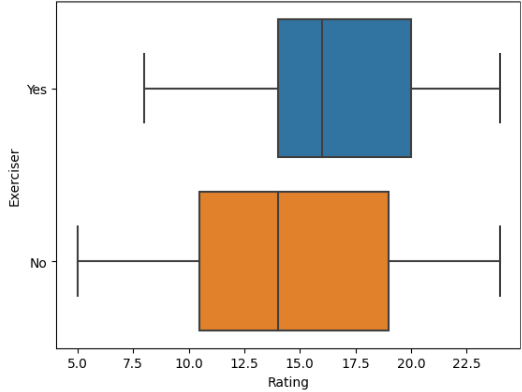


In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Exercise%20%26%20Productivity.csv', delimiter=';')
df.head()
print(df.columns)

Index(['Employee', 'Exerciser', 'Rating'], dtype='object')


<Figure size 800x500 with 0 Axes>

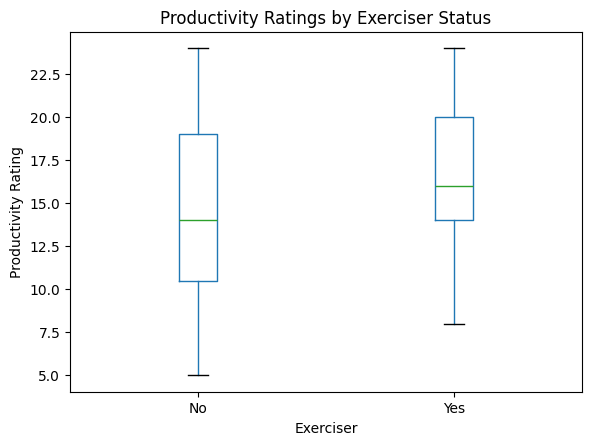

In [14]:
# Boxplot of Ratings by Exerciser
plt.figure(figsize=(8,5))
df.boxplot(column='Rating', by='Exerciser', grid=False)
plt.title('Productivity Ratings by Exerciser Status')
plt.suptitle('')
plt.xlabel('Exerciser')
plt.ylabel('Productivity Rating')
plt.show()

In [8]:
from scipy.stats import ttest_ind

# Split groups
ratings_yes = df[df['Exerciser'] == 'Yes']['Rating']
ratings_no = df[df['Exerciser'] == 'No']['Rating']

# Perform independent t-test (two-sided)
t_stat, p_val_two_sided = ttest_ind(ratings_yes, ratings_no, equal_var=False)

print(f"Two-sided p-value: {p_val_two_sided:.8f}")

# One-sided p-value (exercisers > non-exercisers)
mean_diff = ratings_yes.mean() - ratings_no.mean()
if mean_diff > 0:
    p_val_one_sided = p_val_two_sided / 2
else:
    p_val_one_sided = 1 - (p_val_two_sided / 2)

print(f"One-sided p-value: {p_val_one_sided:.8f}")

if p_val_one_sided < 0.05:
    print("Reject H0: Exercisers have significantly higher productivity.")
else:
    print("Fail to reject H0: No significant difference in productivity.")


Two-sided p-value: 0.01259959
One-sided p-value: 0.00629979
Reject H0: Exercisers have significantly higher productivity.


In [9]:
import numpy as np

n1 = len(ratings_yes)
n2 = len(ratings_no)

mean1 = ratings_yes.mean()
mean2 = ratings_no.mean()

std1 = ratings_yes.std()
std2 = ratings_no.std()

# Pooled std
s_pooled = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))

# Cohen's d
cohen_d = (mean1 - mean2) / s_pooled

print(f"Cohen's d: {cohen_d:.5f}")


Cohen's d: 0.55509
